# Loading a Single-Cell Analysis from a CSV

This tutorial shows what it is like when data is re-loaded from a PalmettoBUG-exported CSV file. Note that this is done
with a solution-mode dataset, but even with imaging data re-loading from a CSV will prevent any spatial analysis methods
from being easily available!

NOTE! Depends on the AnalysisFromFCS notebook having been previously run (specifically the final / data export cell). 

In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.objects as so

import tifffile as tf

import palmettobug as pbug

The PalmettoBUG package is copyrighted 2024-2025 by the Medical University of South Carolina and licensed under the GPL-3 license.
It is free & open source software, can  be redistributed in compliance with the GPL3 license, and comes with absolutely no warranty.
In python, use palmettobug.print_license() to see the license, or use palmettobug.print_3rd_party_license_info() to print information
about the licenses and copyright of 3rd party software used in PalmettoBUG itself or in the creation of PalmettoBUG.


In [2]:
pbug.__version__

'0.2.11'

### CHANGE The following directory to match an existing directory on your computer if you are testing this tutorial on your own machine!

In [3]:
my_computer_path =  "C:/Users/Default/Desktop"

## Set up CSV project directory and load from exported data

In [4]:
## Note this depends on the From_FCS_solution_mode notebook in this same folder -- where in the final cell a datatable was exported to this address:
exported_csv =  f"{my_computer_path}/Example_CyTOF/main/Data_tables/export.csv"

new_directory = f"{my_computer_path}/Example_CyTOF/csv_load"
if not os.path.exists(new_directory):
    os.mkdir(new_directory)

In [5]:
""" 
quick test of CSV reload api
"""
Analysis_experiment = pbug.Analysis()
Analysis_experiment.load_data(directory = new_directory, csv = exported_csv, arcsinh_cofactor = 0)

C:\Users\Default\Desktop\PalmettoBUG\palmettobug\Analysis_functions\Analysis.py:448: DtypeWarning: Columns (48,49,53,54,56) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_path)


Loading the CSV did not successfully load spatial information (this could be normal depending on the experiment), 
with the following erorr message

'areas'
Could not load regionprops data, presuming this is a solution-mode dataset -- Spatial analyses will not be possible.


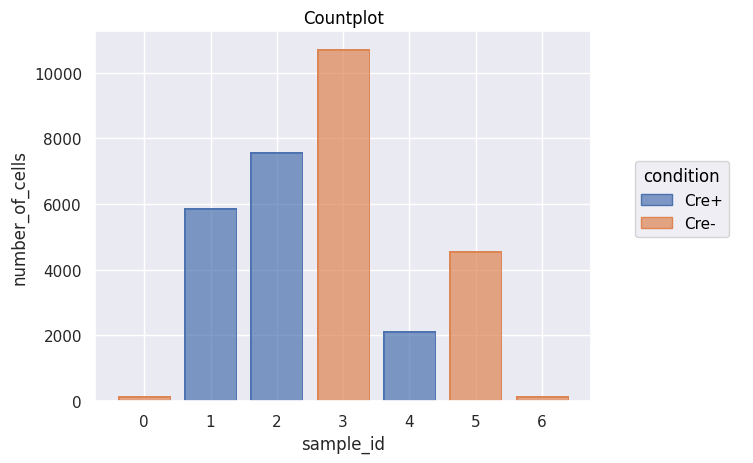

In [6]:
'''
A basic countplot shows that the data has been loaded
'''
fig = Analysis_experiment.plot_cell_counts(group_by = "sample_id", color_by = "condition", filename = "countplot.png")
fig

In [7]:
Analysis_experiment.data.obs['metaclustering'] = Analysis_experiment.data.obs['metaclustering'].astype('int').astype('category')

## Do Analysis steps on loaded data!

In [8]:
'''
Will begin by scaling the data -- let's try the qnorm method, it tends to very aggressively reshape the data
'''
Analysis_experiment.do_scaling("qnorm")

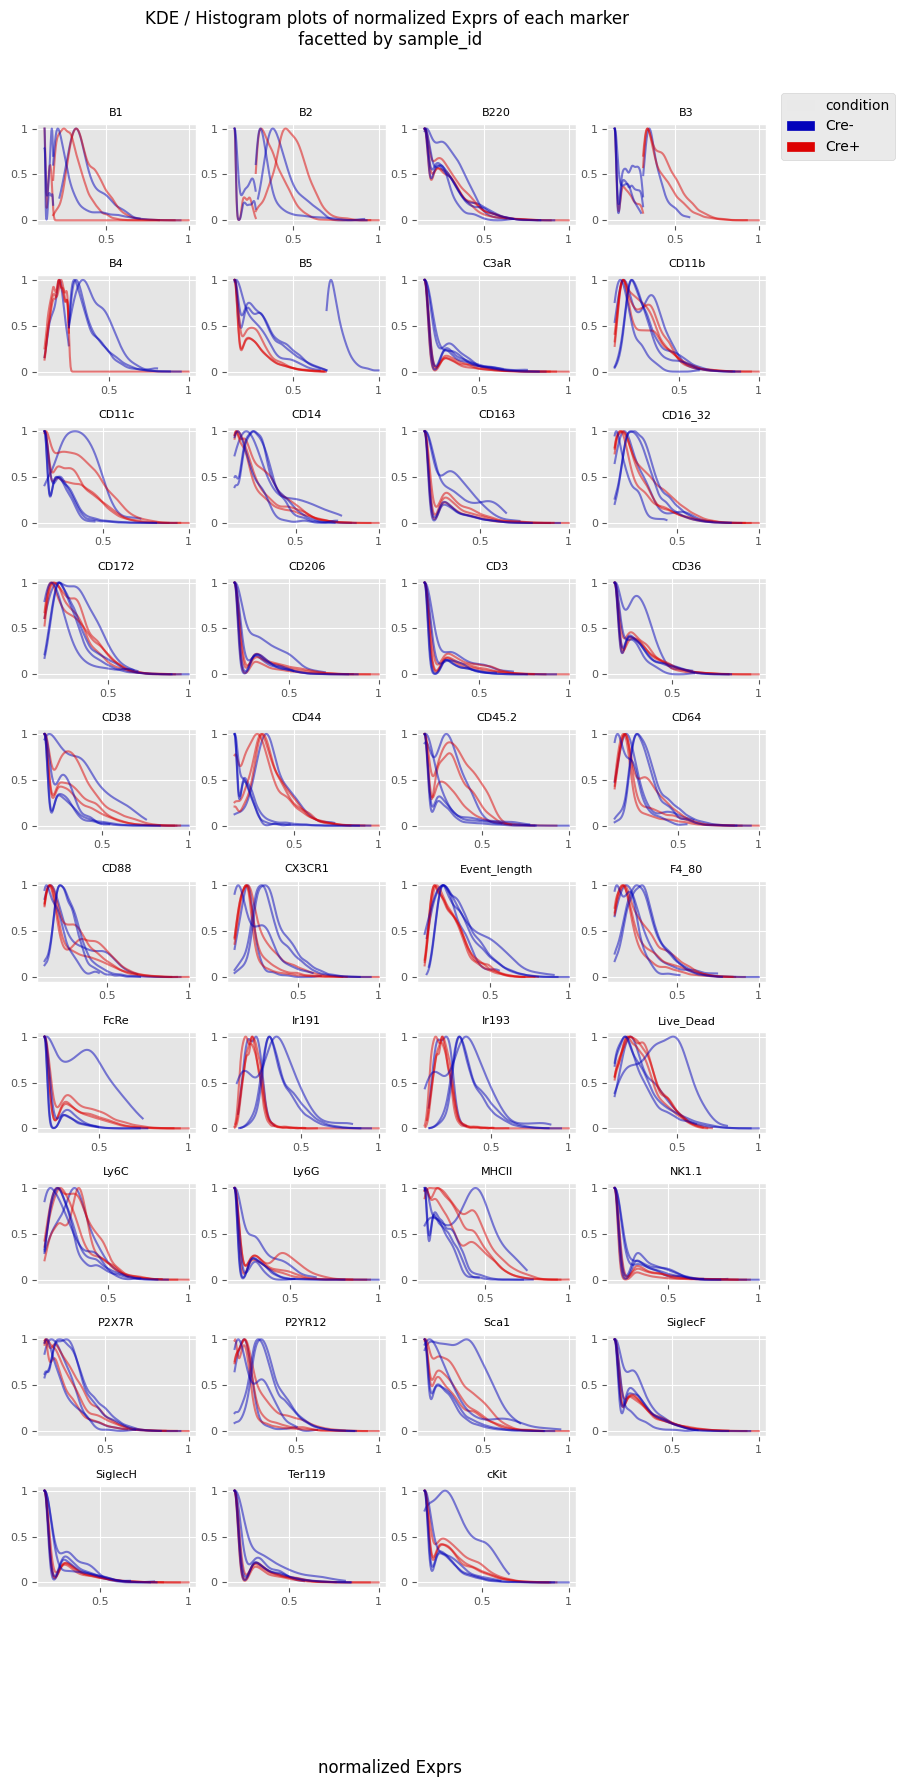

In [9]:
fig = Analysis_experiment.plot_ROI_histograms(filename = "sample_id_histo", color_by = "condition")
fig

## The cell clusterings from the exported data are still available

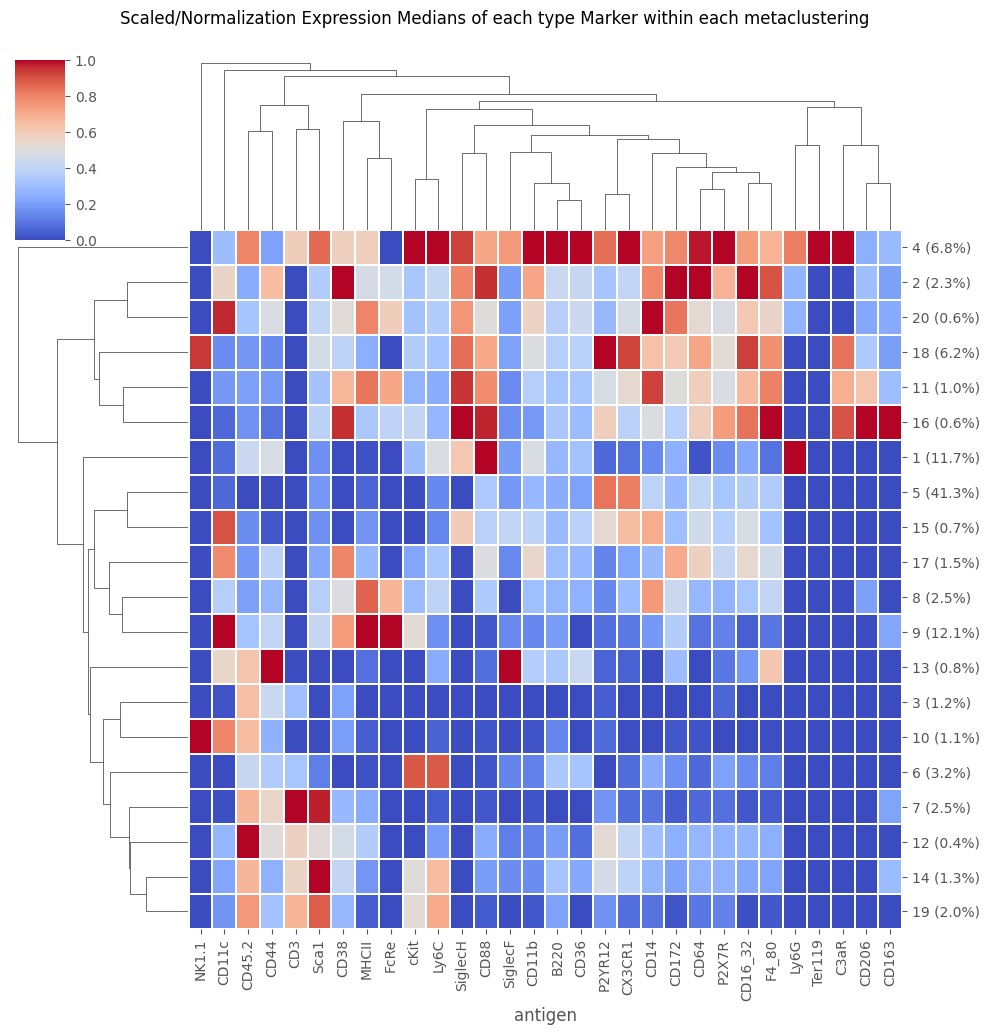

In [10]:
## Because we are reloading this from a previously exported CSV that already contains a metaclustering, we can plot that already
fig = Analysis_experiment.plot_medians_heatmap(filename = "heatmap", marker_class = "type", groupby = "metaclustering")
fig

## But we can still re-cluster the data if we like

Note, however, that this can "overwrite" the cell clusterings from the original data export -- as it does here.
This overwrite is temporary, as if we reloaded the CSV without saving it, the new netaclustering would disapear. However, as soon as we 
do the new FlowSOM / metaclustering, the prior one becomes unavailable until reload.

In [11]:
Analysis_experiment.do_flowsom(n_clusters = 20, XY_dim = 10, seed = 1234)

C:\Users\benca\miniforge3\envs\main\lib\site-packages\mudata\_core\mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
C:\Users\benca\miniforge3\envs\main\lib\site-packages\mudata\_core\mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)
2025-10-23 10:08:32.335 | DEBUG    | flowsom.main:__init__:82 - Reading input.
2025-10-23 10:08:32.384 | DEBUG    | flowsom.main

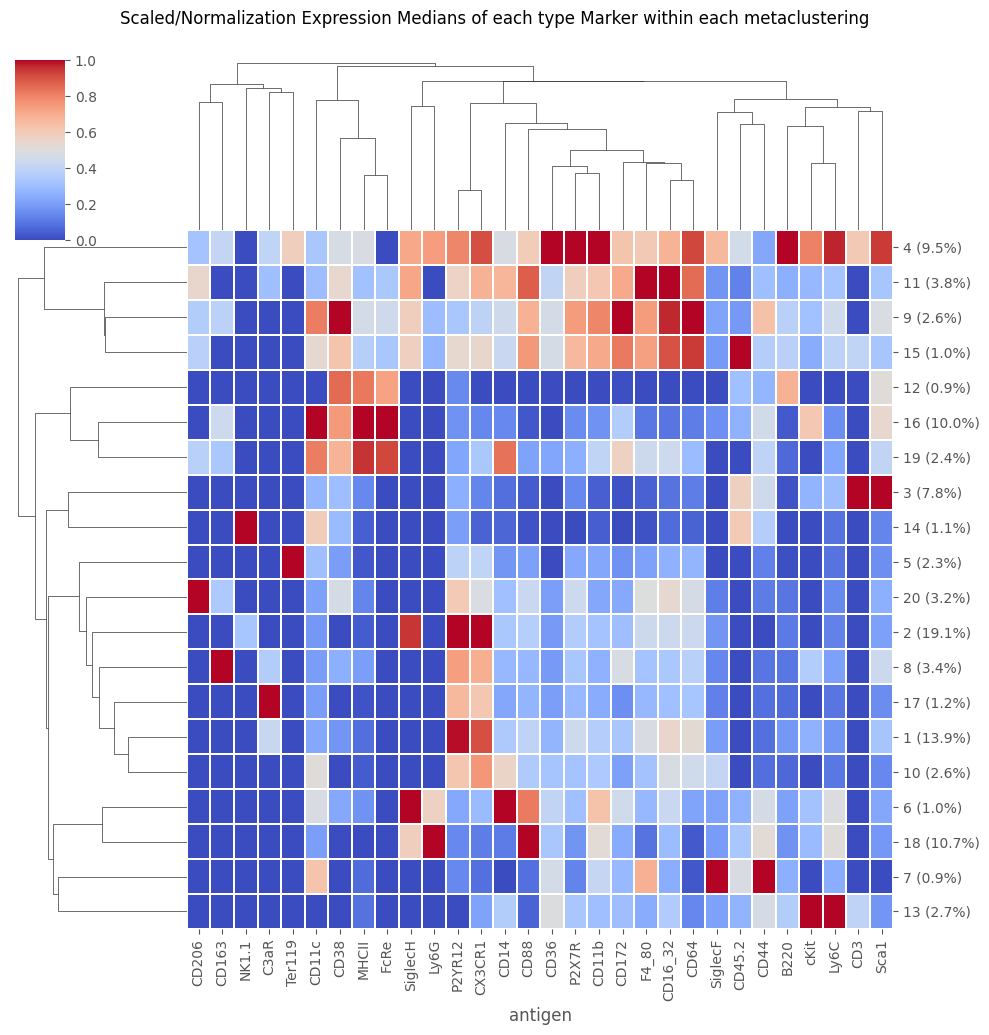

In [12]:
fig = Analysis_experiment.plot_medians_heatmap(filename = "heatmap", marker_class = "type", groupby = "metaclustering")
fig

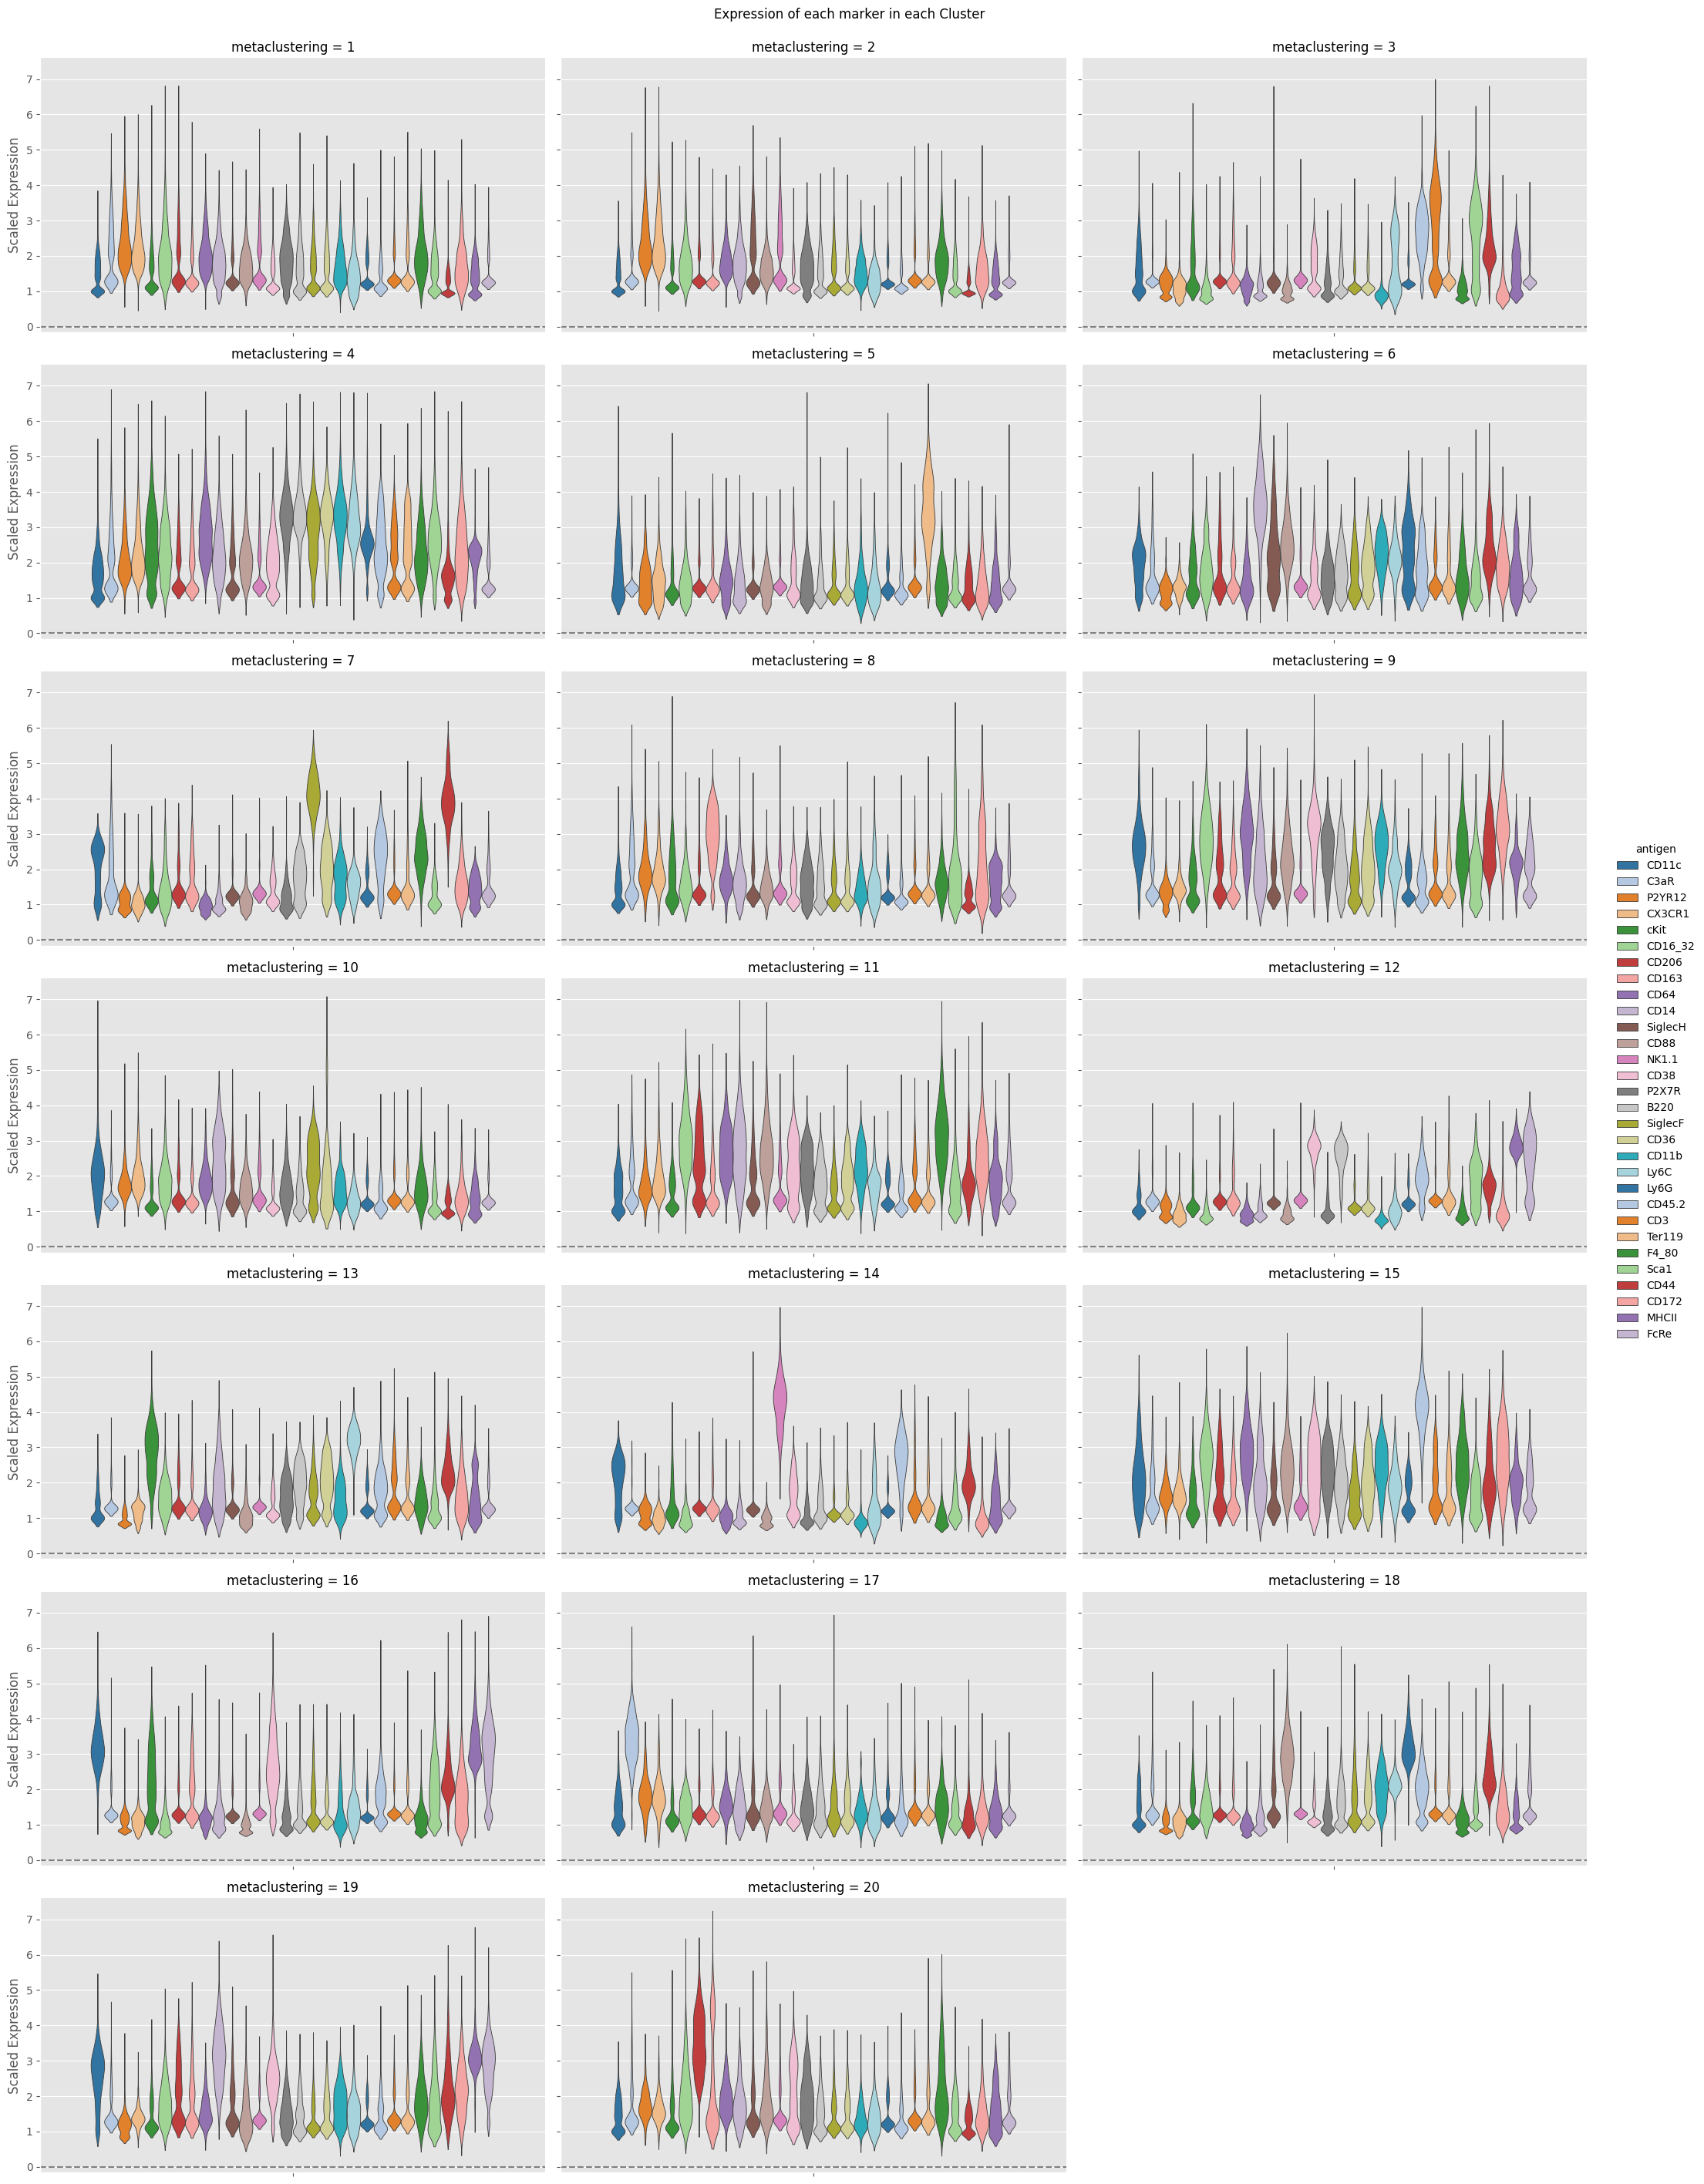

In [13]:
fig = Analysis_experiment.plot_cluster_distributions(filename = "violin", groupby_column = "metaclustering", marker_class = 'type', 
                                    plot_type = "violin", comp_type = "raw")
fig

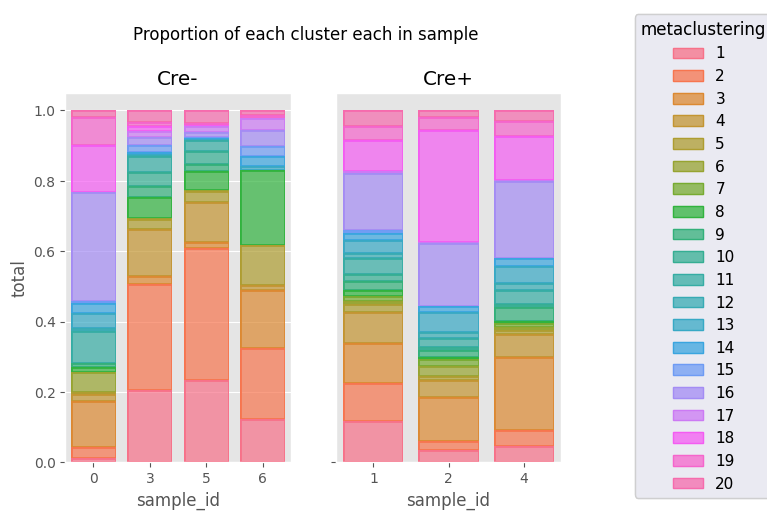

In [14]:
fig = Analysis_experiment.plot_cluster_abundance_1(filename = "abundance_boxplot", groupby_column = "metaclustering")   #, hue = "condition", plot_type = "boxplot")
fig